In [3]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [4]:
np.random.seed(42)
n_points_per_cluster = 200

C1 = np.array([-3, -1]) + 1.0 * np.random.randn(n_points_per_cluster, 2)
C2 = np.array([2, -2]) + 0.5 * np.random.randn(n_points_per_cluster, 2)
C3 = np.array([0, 2]) + 0.8 * np.random.randn(n_points_per_cluster, 2)
C4 = np.array([-1, 4]) + 0.2 * np.random.randn(n_points_per_cluster, 2)
C5 = np.array([1, -3]) + 1.2 * np.random.randn(n_points_per_cluster, 2)
C6 = np.array([4, 5]) + 1.5 * np.random.randn(n_points_per_cluster, 2)

X_modified = np.vstack((C1, C2, C3, C4, C5, C6))

In [5]:
clust = OPTICS(min_samples=40, xi=0.1, min_cluster_size=0.1)
clust.fit(X_modified)

OPTICS(min_cluster_size=0.1, min_samples=40, xi=0.1)

In [6]:
labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.7  # tighter clusters
)

labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=1.5  # broader clusters
)

In [7]:
space = np.arange(len(X_modified))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

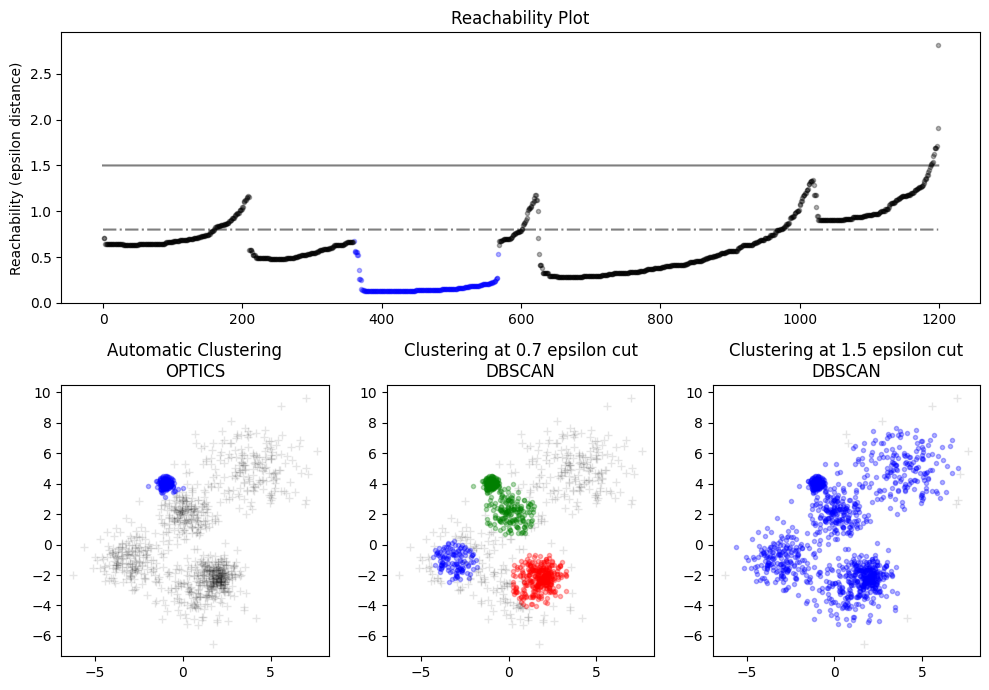

In [8]:
space = np.arange(len(X_modified))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability Plot
colors = ["b.", "g.", "r.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 1.5, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.8, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS Clustering Result
colors = ["b.", "g.", "r.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X_modified[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X_modified[clust.labels_ == -1, 0], X_modified[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN Result at eps = 0.7
colors = ["b.", "g.", "r.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X_modified[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X_modified[labels_050 == -1, 0], X_modified[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.7 epsilon cut\nDBSCAN")

# DBSCAN Result at eps = 1.5
colors = ["b.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X_modified[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X_modified[labels_200 == -1, 0], X_modified[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 1.5 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()